In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
curr_dir = os.getcwd()
print(os.listdir(curr_dir))
drive_path = os.path.join(curr_dir,'drive','MyDrive')
dataset_path = os.path.join(drive_path,'Pianalytix_Datasets')
print(os.listdir(dataset_path))
image_dataset_path = os.path.join(dataset_path,'Soil_Dataset')
print(os.listdir(image_dataset_path))

['.config', 'drive', 'sample_data']
['FinalData.csv', 'Fertilizer.csv', 'FertilizerData.csv', 'Rainfall.csv', 'MergeFileCrop.csv', 'cpdata.csv', 'Soil_Dataset']
['Test', 'Train']


In [ ]:
train_data = os.path.join(image_dataset_path,'Train')
test_data = os.path.join(image_dataset_path,'Test')

In [ ]:
os.listdir(train_data)

['Alluvial', 'Clay', 'Red', 'Black']

In [ ]:
train_alluvial_data = os.path.join(train_data,'Alluvial')
train_black_data = os.path.join(train_data,'Black')
train_clay_data = os.path.join(train_data,'Clay')
train_red_data = os.path.join(train_data,'Red')

In [ ]:
test_alluvial_data = os.path.join(test_data,'Alluvial')
test_black_data = os.path.join(test_data,'Black')
test_clay_data = os.path.join(test_data,'Clay')
test_red_data = os.path.join(test_data,'Red')

In [ ]:
def SamplesCount(dname): 
    return len(os.listdir(dname))

In [ ]:
print("Training Samples")
print(f" Sample count for Alluvial Soil => { SamplesCount(train_alluvial_data)}")
print(f" Sample count for Black Soil => { SamplesCount(train_black_data)}")
print(f" Sample count for Clay Soil => { SamplesCount(train_clay_data)}")
print(f" Sample count for Red Soil => { SamplesCount(train_red_data)}")

Training Samples
 Sample count for Alluvial Soil => 175
 Sample count for Black Soil => 212
 Sample count for Clay Soil => 144
 Sample count for Red Soil => 184


In [ ]:
print("Testing Samples")
print(f" Sample count for Alluvial Soil => { SamplesCount(test_alluvial_data)}")
print(f" Sample count for Black Soil => { SamplesCount(test_black_data)}")
print(f" Sample count for Clay Soil => { SamplesCount(test_clay_data)}")
print(f" Sample count for Red Soil => { SamplesCount(test_red_data)}")

Testing Samples
 Sample count for Alluvial Soil => 48
 Sample count for Black Soil => 47
 Sample count for Clay Soil => 47
 Sample count for Red Soil => 46


In [ ]:
from tensorflow.keras.layers import Dense , Flatten , Conv2D , MaxPooling2D , Dropout
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Conv2D( 32 , (3,3) , activation = 'relu' , input_shape = (150,150,3) ))

model.add(MaxPooling2D((2,2)))

model.add(Conv2D( 64 , (3,3) , activation = 'relu'  ))

model.add(MaxPooling2D((2,2)))

model.add(Conv2D( 128 , (3,3) , activation = 'relu'  ))

model.add(MaxPooling2D((2,2)))

model.add(Conv2D( 128 , (3,3) , activation = 'relu'  ))

model.add(MaxPooling2D((2,2)))

model.add(Conv2D( 32 , (3,3) , activation = 'relu'  ))

model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(512 , activation = 'relu' ))

model.add(Dense(1 , activation = 'sigmoid' ))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile( loss = 'binary_crossentropy' ,optimizer = RMSprop(lr = 1e-4) , metrics = ['acc'])

In [ ]:
### preprocessing our images before feeding them into the network

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40 ,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True,
                    fill_mode = 'nearest'
                )

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                        train_data ,
                        target_size = (150,150),
                        batch_size = 20,
                        class_mode='categorical'
                )

test_generator = test_datagen.flow_from_directory(
                        test_data ,
                        target_size = (150,150),
                        batch_size = 20,
                        class_mode='categorical'
                )

Found 715 images belonging to 4 classes.
Found 188 images belonging to 4 classes.


In [ ]:
history = model.fit(
            train_generator,
            epochs = 5
        )

Epoch 1/25
36/36 [==============================] - 377s 10s/step - loss: 0.5881 - acc: 0.7360
Epoch 2/25
36/36 [==============================] - 34s 945ms/step - loss: 0.5695 - acc: 0.7500
Epoch 3/25
36/36 [==============================] - 34s 946ms/step - loss: 0.5673 - acc: 0.7500
Epoch 4/25
36/36 [==============================] - 34s 939ms/step - loss: 0.5654 - acc: 0.7500
Epoch 5/25
36/36 [==============================] - 34s 937ms/step - loss: 0.5646 - acc: 0.7500
Epoch 6/25
36/36 [==============================] - 34s 934ms/step - loss: 0.5640 - acc: 0.7500
Epoch 7/25
36/36 [==============================] - 34s 937ms/step - loss: 0.5638 - acc: 0.7500
Epoch 8/25
36/36 [==============================] - 34s 944ms/step - loss: 0.5637 - acc: 0.7500
Epoch 9/25
36/36 [==============================] - 34s 941ms/step - loss: 0.5634 - acc: 0.7500
Epoch 10/25
36/36 [==============================] - 34s 937ms/step - loss: 0.5634 - acc: 0.7500
Epoch 11/25
36/36 [=====================

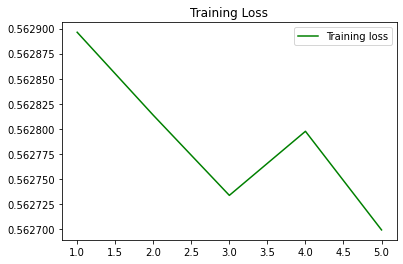

In [ ]:
plt.plot(epochs , loss , color = 'green' , label = 'Training loss')
plt.title('Training Loss')
plt.legend()

plt.show()

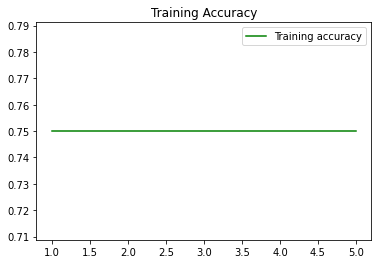

In [ ]:
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs , acc , color = 'green' , label = 'Training accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.show()

In [ ]:
test_loss , test_acc = model.evaluate(test_generator , steps = 50)
print("Test accuracy : ---> ",test_acc)

10/50 [=====>........................] - 57s 6s/step - loss: 0.5626 - acc: 0.7500
Test accuracy : --->  0.75
